<a href="https://colab.research.google.com/github/Dimas0824/PCVK/blob/main/Pertemuan3/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

D. PRAKTIKUM



2. Akses folder images pada Google Drive Anda dengan kode berikut:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:

image.png


dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab:


In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-2181802053.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(female[y,x,c] + brightness, 0, 255)


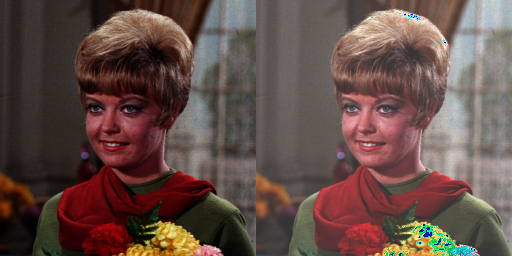

In [2]:
print('Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not an integer.')

female = cv.imread('/content/drive/MyDrive/PCVK/Images/Pertemuan3/female.tiff')
brightness_image = np.zeros(female.shape, female.dtype)

#akses per piksel
for y in range(female.shape[0]):
    for x in range(female.shape[1]):
        for c in range(female.shape[2]):
            brightness_image[y,x,c] = np.clip(female[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([female, brightness_image])
cv2_imshow(final_frame)

TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:  

In [3]:
import matplotlib.pyplot as plt


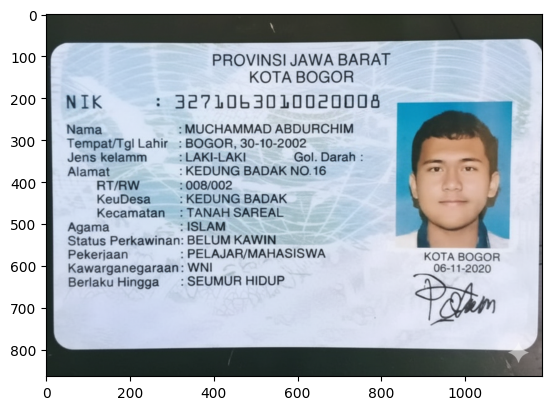

In [4]:
# Load dan ubah ke RGB
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP_OHIM.png')
original_RGB = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Tampilkan hasil
plt.imshow(original_RGB)
plt.show()

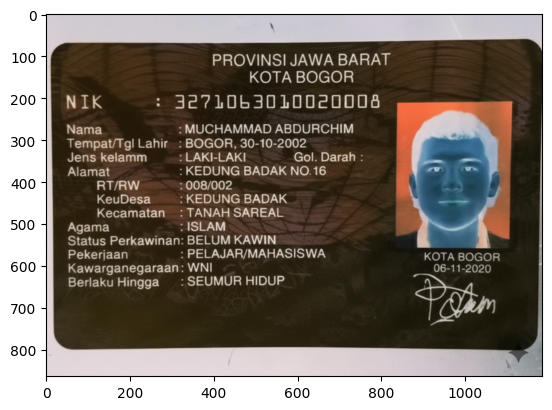

In [5]:
inverse = 255 - original_RGB
plt.imshow(inverse)
plt.show()

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
---------------------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


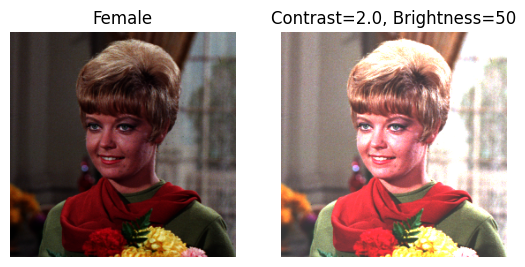

In [6]:
print("Mengubah kontras dan tingkat kecerahan citra")
print("---------------------------------------------------------")
# Input dari user
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Terapkan brightness dan contrast
# Rumus: g(x,y) = a * f(x,y) + b
new_img = contrast * female + brightness
new_img = np.clip(new_img, 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(female, cv.COLOR_BGR2RGB))
plt.title("Female")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
plt.title(f"Contrast={contrast}, Brightness={brightness}")
plt.axis("off")

plt.show()

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
---------------------------------------------------------
Masukkan nilai kecerahan: 50


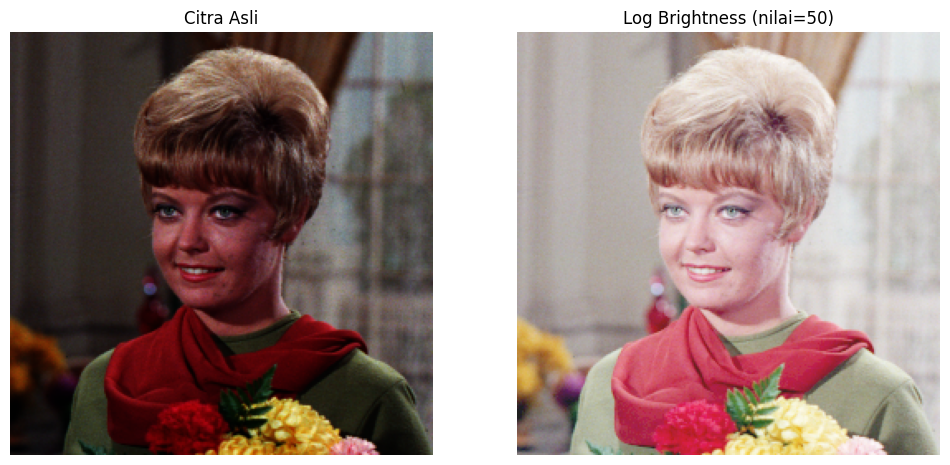

In [16]:
# Baca gambar
female = cv.imread('/content/drive/MyDrive/PCVK/Images/Pertemuan3/female.tiff')

# Ubah ke RGB
female = cv.cvtColor(female, cv.COLOR_BGR2RGB)

print("Mengubah tingkat kecerahan citra dengan Transformasi Log")
print("---------------------------------------------------------")

# Input brightness dari user
brightness = int(input("Masukkan nilai kecerahan: "))

# Ubah tipe data ke float agar aman untuk log
img_float = female.astype(np.float32)

# Hitung konstanta c (tanpa brightness dulu)
c = 255 / np.log(1 + np.max(img_float))

# Terapkan transformasi log brightness
# brightness dipakai sebagai pengali ekstra agar lebih terang
log_result = brightness * (c * np.log(1 + img_float))

# Normalisasi ulang ke [0,255] agar aman ditampilkan
log_result = log_result / np.max(log_result) * 255
log_result = log_result.astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(female)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(log_result)
plt.title(f"Log Brightness (nilai={brightness})")
plt.axis("off")

plt.show()


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

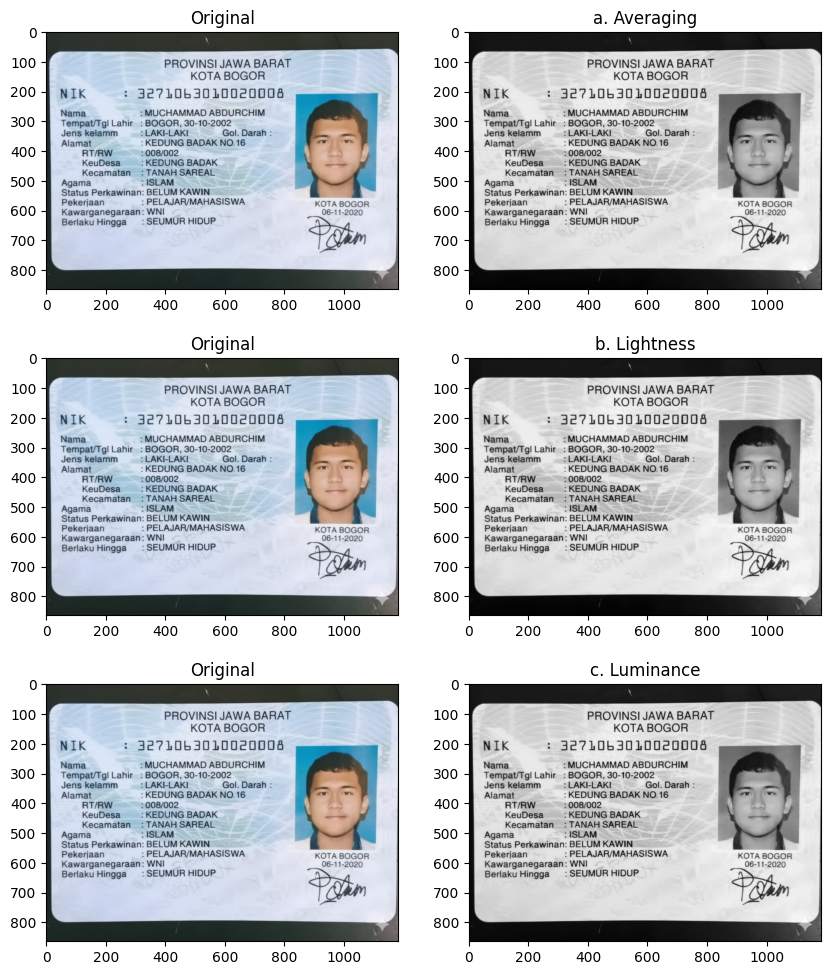

In [17]:
# Ambil channel warna
R = original_RGB[:,:,0].astype(np.float32)
G = original_RGB[:,:,1].astype(np.float32)
B = original_RGB[:,:,2].astype(np.float32)

# ----------------- Metode Grayscale -----------------
# 1. Averaging
gray_avg = ((R + G + B) / 3).astype(np.uint8)

# 2. Lightness
gray_light = ((np.maximum(np.maximum(R, G), B) + np.minimum(np.minimum(R, G), B)) / 2).astype(np.uint8)

# 3. Luminance
gray_lum = (0.21*R + 0.72*G + 0.07*B).astype(np.uint8)

# ----------------- Tampilkan Hasil -----------------
plt.figure(figsize=(10,12))

# Original vs Averaging
plt.subplot(3,2,1)
plt.imshow(original_RGB)
plt.title("Original")

plt.subplot(3,2,2)
plt.imshow(gray_avg, cmap="gray")
plt.title("a. Averaging")

# Original vs Lightness
plt.subplot(3,2,3)
plt.imshow(original_RGB)
plt.title("Original")

plt.subplot(3,2,4)
plt.imshow(gray_light, cmap="gray")
plt.title("b. Lightness")

# Original vs Luminance
plt.subplot(3,2,5)
plt.imshow(original_RGB)
plt.title("Original")

plt.subplot(3,2,6)
plt.imshow(gray_lum, cmap="gray")
plt.title("c. Luminance")

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

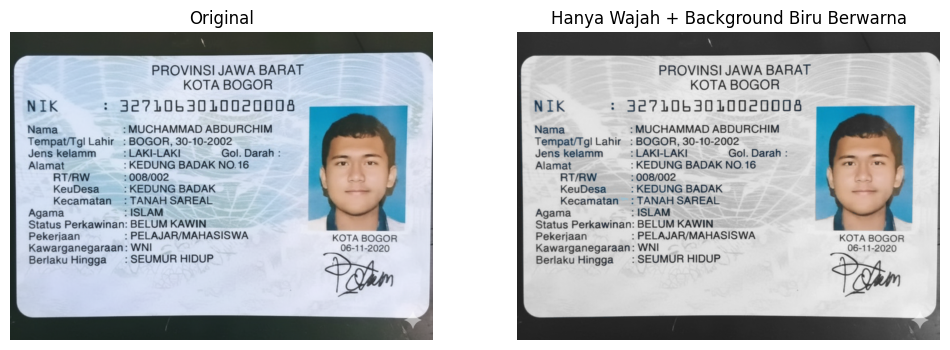

In [18]:
# Buat grayscale
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_RGB = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

# Konversi ke HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Range warna kulit (coba sesuaikan jika perlu)
lower_skin = np.array([0, 30, 60], dtype=np.uint8)
upper_skin = np.array([20, 150, 255], dtype=np.uint8)
mask_skin = cv.inRange(hsv, lower_skin, upper_skin)

# Range warna biru background
lower_blue = np.array([90, 70, 50], dtype=np.uint8)
upper_blue = np.array([130, 255, 255], dtype=np.uint8)
mask_blue = cv.inRange(hsv, lower_blue, upper_blue)

# Gabungkan mask
mask = cv.bitwise_or(mask_skin, mask_blue)

# Bagian berwarna dan grayscale
color_part = cv.bitwise_and(original_RGB, original_RGB, mask=mask)
gray_part  = cv.bitwise_and(gray_RGB, gray_RGB, mask=cv.bitwise_not(mask))
result = cv.add(color_part, gray_part)

# ----------------- Tampilkan Hasil -----------------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(original_RGB)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Hanya Wajah + Background Biru Berwarna")
plt.axis("off")

plt.show()

D2. Operasi Aritmatika dan Logika

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma (misal 0.5, 1.0, 2.0, 3.0): 3


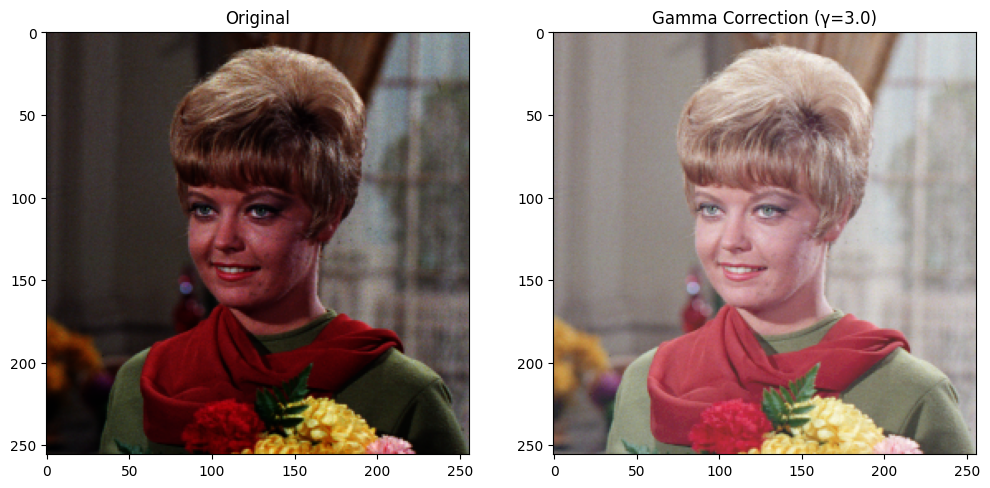

In [19]:
# Baca citra mobil
original = cv.imread('/content/drive/MyDrive/PCVK/Images/Pertemuan3/female.tiff')
female_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

print(' Gamma Correction pada citra ')
print('----------------------------------')

# Input gamma dengan error handling
try:
    gamma = float(input("Masukkan nilai Gamma (misal 0.5, 1.0, 2.0, 3.0): "))
except ValueError:
    print("Error, input bukan angka!")
    gamma = 1.0  # default

# Inverse gamma
invGamma = 1.0 / gamma

# Buat lookup table untuk percepatan
table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")

# Terapkan gamma correction
gamma_corrected = cv.LUT(female_rgb, table)

# ----------------- Tampilkan Hasil -----------------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(female_rgb)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected)
plt.title(f"Gamma Correction (γ={gamma})")

plt.show()


2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi
citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).
Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0
(000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.
Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

Masukkan nilai bit depth (1-7): 2


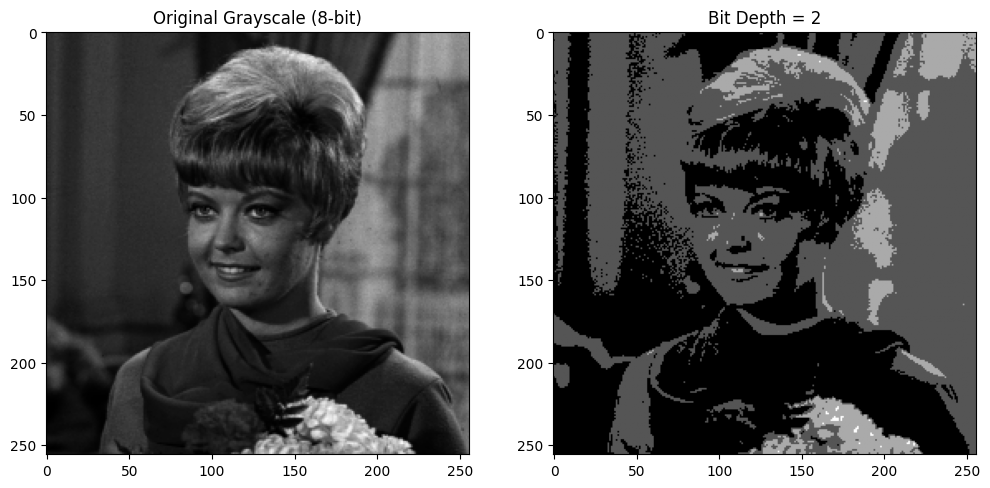

In [20]:
# Input bit depth dari user
bit_depth = int(input("Masukkan nilai bit depth (1-7): "))

# Load gambar dan ubah ke grayscale
female_rgb = cv.imread("/content/drive/MyDrive/PCVK/Images/Pertemuan3/female.tiff")
female_gray = cv.cvtColor(female_rgb, cv.COLOR_BGR2GRAY)

# Hitung level sesuai rumus
level = 255 / (pow(2, bit_depth) - 1)

# Terapkan transformasi bit depth
depth_image = np.round(female_gray / level) * level
depth_image = depth_image.astype(np.uint8)

# ----------------- Tampilkan Hasil -----------------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(female_gray, cmap="gray")
plt.title("Original Grayscale (8-bit)")

plt.subplot(1,2,2)
plt.imshow(depth_image, cmap="gray")
plt.title(f"Bit Depth = {bit_depth}")

plt.show()

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.  
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Masukkan jumlah maksimum citra yang akan dipakai: 10


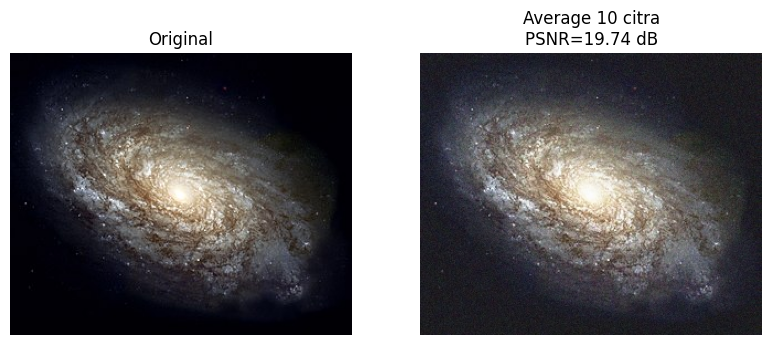


Hasil PSNR (dB):
----------------
10 citra : 19.74 dB


In [29]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
from math import log10, sqrt
from IPython.display import clear_output

# ----------------- Fungsi Hitung PSNR -----------------
def hitung_psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * log10(255.0 / sqrt(mse))

# ----------------- Fungsi Average Denoising -----------------
def average_denoising(original_path, noise_folder, jumlah_list, tampilkan=True):
    """
    Melakukan average denoising dan hitung PSNR.

    Params:
        original_path (str): path citra original
        noise_folder (str): folder berisi citra noise (*.jpg)
        jumlah_list (list): daftar jumlah citra yang akan di-average
        tampilkan (bool): apakah menampilkan hasil gambar
    Return:
        dict -> {jumlah: (avg_img, psnr_val)}
    """
    # Baca citra original
    original = cv.imread(original_path)
    if original is None:
        print(f"Error: Tidak dapat memuat citra original dari path: {original_path}")
        return None # Return None or raise an error as appropriate

    original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

    # Baca semua citra noise
    cv_img = []
    for img_path in glob.glob(noise_folder + "/*.jpg"):
        n = cv.imread(img_path)
        if n is not None:
            cv_img.append(cv.cvtColor(n, cv.COLOR_BGR2RGB))
        else:
            print(f"Warning: Tidak dapat memuat citra noise dari path: {img_path}")

    if not cv_img:
        print(f"Error: Tidak ada citra noise yang berhasil dimuat dari folder: {noise_folder}")
        return None # Return None or raise an error as appropriate

    cv_img = np.array(cv_img)

    # Simpan hasil
    results = {}
    for jumlah in jumlah_list:
        if jumlah > len(cv_img):
            print(f"Warning: Jumlah citra yang diminta ({jumlah}) melebihi jumlah citra noise yang tersedia ({len(cv_img)}). Menggunakan semua citra yang tersedia.")
            jumlah = len(cv_img)
            if jumlah == 0:
                print("Error: Tidak ada citra noise yang tersedia untuk di-average.")
                continue # Skip this iteration if no images are available

        avg_img = np.mean(cv_img[:jumlah], axis=0).astype(np.uint8)
        psnr_val = hitung_psnr(original_rgb, avg_img)
        results[jumlah] = (avg_img, psnr_val)

    # Tampilkan hasil jika diminta
    if tampilkan:
        plt.figure(figsize=(15, 10))
        plt.subplot(2, 3, 1)
        plt.imshow(original_rgb)
        plt.title("Original")
        plt.axis("off")

        i = 2
        for jumlah, (avg_img, psnr_val) in results.items():
            plt.subplot(2, 3, i)
            plt.imshow(avg_img)
            plt.title(f"Average {jumlah} citra\nPSNR={psnr_val:.2f} dB")
            plt.axis("off")
            i += 1

        plt.show()

    return results

# ----------------- Pemanggilan -----------------
# Path citra dan folder noise
original_path = "/content/drive/MyDrive/PCVK/Images/Pertemuan3/galaxy.jpg"
noise_folder = "/content/drive/MyDrive/PCVK/Images/Pertemuan3/noises"

# Bersihkan output lama setiap kali cell dijalankan
clear_output(wait=True)

# Input jumlah citra dari user
try:
    jumlah_input = int(input("Masukkan jumlah maksimum citra yang akan dipakai: "))
except ValueError:
    jumlah_input = 20
    print("Input salah, default = 20")

# Reset list setiap kali dipanggil
jumlah_list = []

# Tambahkan sesuai aturan
if jumlah_input >= 10:
    jumlah_list = [jumlah_input]
else:
    print("Warning: Jumlah citra yang dimasukkan terlalu kecil. Tidak ada PSNR yang dihitung.")

# Jalankan average denoising jika valid
if jumlah_list:
    results = average_denoising(original_path, noise_folder, jumlah_list)

    # Cetak nilai PSNR
    print("\nHasil PSNR (dB):")
    print("----------------")
    for jumlah, (_, psnr_val) in results.items():
        print(f"{jumlah} citra : {psnr_val:.2f} dB")

Masukkan jumlah maksimum citra yang akan dipakai: 20


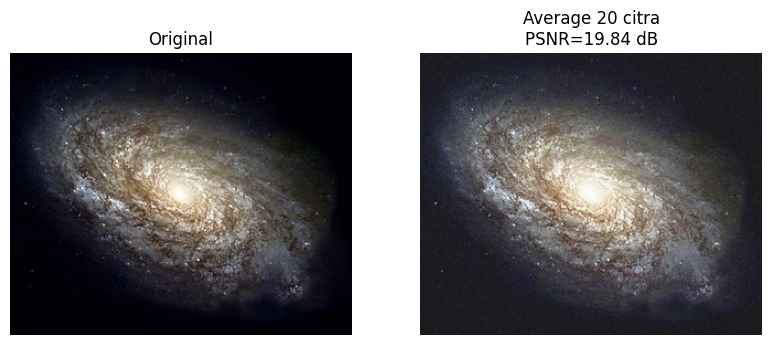


Hasil PSNR (dB):
----------------
20 citra : 19.84 dB


In [25]:
# Bersihkan output lama setiap kali cell dijalankan
clear_output(wait=True)

# Input jumlah citra dari user
try:
    jumlah_input = int(input("Masukkan jumlah maksimum citra yang akan dipakai: "))
except ValueError:
    jumlah_input = 20
    print("Input salah, default = 20")

# Reset list setiap kali dipanggil
jumlah_list = []

# Tambahkan sesuai aturan
if jumlah_input >= 10:
    jumlah_list = [jumlah_input]
else:
    print("Warning: Jumlah citra yang dimasukkan terlalu kecil. Tidak ada PSNR yang dihitung.")

# Jalankan average denoising jika valid
if jumlah_list:
    results = average_denoising(original_path, noise_folder, jumlah_list)

    # Cetak nilai PSNR
    print("\nHasil PSNR (dB):")
    print("----------------")
    for jumlah, (_, psnr_val) in results.items():
        print(f"{jumlah} citra : {psnr_val:.2f} dB")


Masukkan jumlah maksimum citra yang akan dipakai: 40


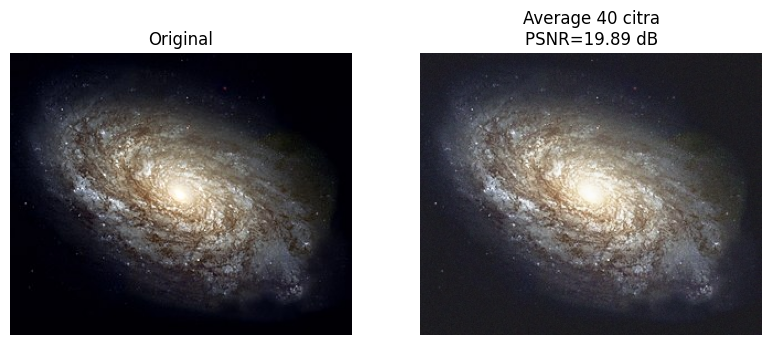


Hasil PSNR (dB):
----------------
40 citra : 19.89 dB


In [26]:
from IPython.display import clear_output

# Bersihkan output lama setiap kali cell dijalankan
clear_output(wait=True)

# Input jumlah citra dari user
try:
    jumlah_input = int(input("Masukkan jumlah maksimum citra yang akan dipakai: "))
except ValueError:
    jumlah_input = 20
    print("Input salah, default = 20")

# Reset list setiap kali dipanggil
jumlah_list = []

# Tambahkan sesuai aturan
if jumlah_input >= 10:
    jumlah_list = [jumlah_input]
else:
    print("Warning: Jumlah citra yang dimasukkan terlalu kecil. Tidak ada PSNR yang dihitung.")

# Jalankan average denoising jika valid
if jumlah_list:
    results = average_denoising(original_path, noise_folder, jumlah_list)

    # Cetak nilai PSNR
    print("\nHasil PSNR (dB):")
    print("----------------")
    for jumlah, (_, psnr_val) in results.items():
        print(f"{jumlah} citra : {psnr_val:.2f} dB")


Masukkan jumlah maksimum citra yang akan dipakai: 80


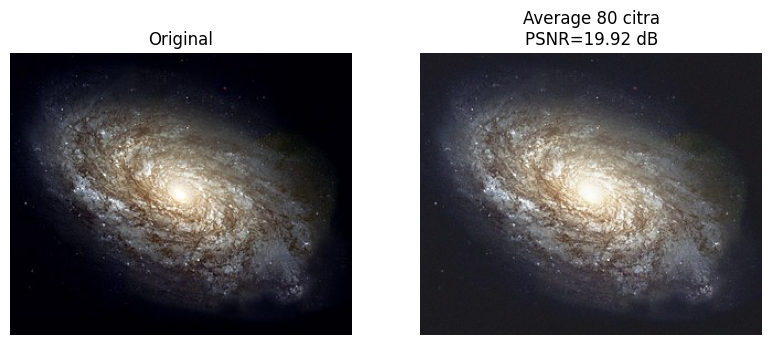


Hasil PSNR (dB):
----------------
80 citra : 19.92 dB


In [27]:
from IPython.display import clear_output

# Bersihkan output lama setiap kali cell dijalankan
clear_output(wait=True)

# Input jumlah citra dari user
try:
    jumlah_input = int(input("Masukkan jumlah maksimum citra yang akan dipakai: "))
except ValueError:
    jumlah_input = 20
    print("Input salah, default = 20")

# Reset list setiap kali dipanggil
jumlah_list = []

# Tambahkan sesuai aturan
if jumlah_input >= 10:
    jumlah_list = [jumlah_input]
else:
    print("Warning: Jumlah citra yang dimasukkan terlalu kecil. Tidak ada PSNR yang dihitung.")

# Jalankan average denoising jika valid
if jumlah_list:
    results = average_denoising(original_path, noise_folder, jumlah_list)

    # Cetak nilai PSNR
    print("\nHasil PSNR (dB):")
    print("----------------")
    for jumlah, (_, psnr_val) in results.items():
        print(f"{jumlah} citra : {psnr_val:.2f} dB")


Masukkan jumlah maksimum citra yang akan dipakai: 100


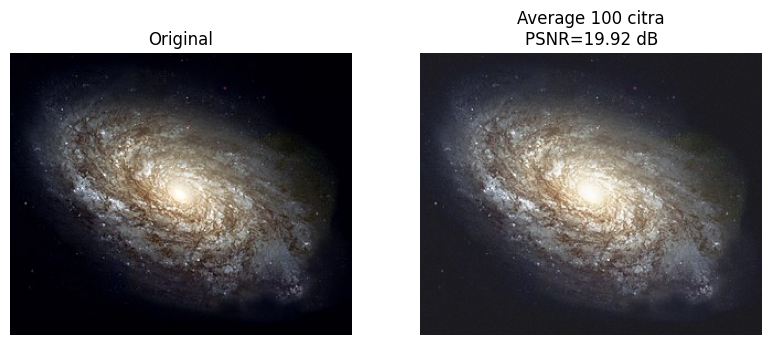


Hasil PSNR (dB):
----------------
100 citra : 19.92 dB


In [28]:
from IPython.display import clear_output

# Bersihkan output lama setiap kali cell dijalankan
clear_output(wait=True)

# Input jumlah citra dari user
try:
    jumlah_input = int(input("Masukkan jumlah maksimum citra yang akan dipakai: "))
except ValueError:
    jumlah_input = 20
    print("Input salah, default = 20")

# Reset list setiap kali dipanggil
jumlah_list = []

# Tambahkan sesuai aturan
if jumlah_input >= 10:
    jumlah_list = [jumlah_input]
else:
    print("Warning: Jumlah citra yang dimasukkan terlalu kecil. Tidak ada PSNR yang dihitung.")

# Jalankan average denoising jika valid
if jumlah_list:
    results = average_denoising(original_path, noise_folder, jumlah_list)

    # Cetak nilai PSNR
    print("\nHasil PSNR (dB):")
    print("----------------")
    for jumlah, (_, psnr_val) in results.items():
        print(f"{jumlah} citra : {psnr_val:.2f} dB")


4. Buat image masking
Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

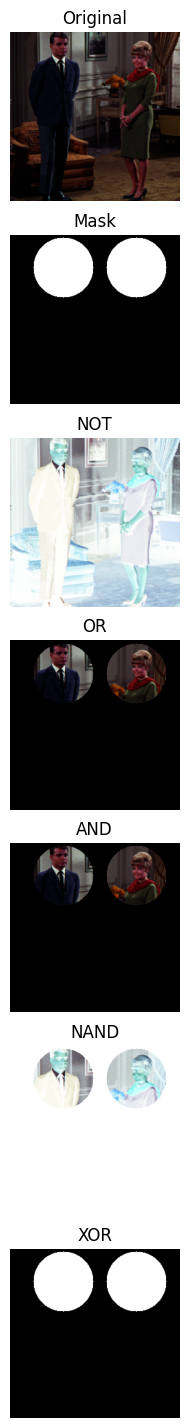

In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Pertemuan3/couple.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Buat mask lingkaran
mask = np.zeros(img.shape[:2], dtype="uint8")
cv.circle(mask, (80, 50), 45, 255, -1)   # lingkaran kiri
cv.circle(mask, (190, 50), 45, 255, -1)  # lingkaran kanan

# 1. NOT (komplemen citra)
not_img = cv.bitwise_not(img_rgb)

# 2. OR (citra OR mask)
or_img = cv.bitwise_or(img_rgb, img_rgb, mask=mask)

# 3. AND (masking standar)
and_img = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

# 4. NAND = NOT(AND)
nand_img = cv.bitwise_not(and_img)

# 5. XOR = (img XOR not_img) pada area mask
xor_img = cv.bitwise_xor(img_rgb, not_img, mask=mask)

# ----------------- Tampilkan -----------------
titles = ["Original", "Mask", "NOT", "OR", "AND", "NAND", "XOR"]
images = [img_rgb, mask, not_img, or_img, and_img, nand_img, xor_img]

plt.figure(figsize=(6,18))
for i in range(len(images)):
    plt.subplot(len(images), 1, i+1)
    if i == 1:  # Mask grayscale
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.show()


Tuliskan hasil analisa anda:

1. Dari praktikum kali nomor 5 ini kita diberikan tugas untuk membuat masking berbentuk lingkaran berjumlah 2 buah diarea gambar dengan berbagai operator.
2. NOT (Komplemen)
    *   Semua pixel citra dibalik → yang terang menjadi gelap, yang gelap menjadi terang.
    *   Efeknya menghasilkan citra negatif.
    *   Berguna untuk menonjolkan detail di area gelap.
3. OR (Atau)
    * Area mask (putih) tetap menampilkan bagian asli gambar, sedangkan area hitam mask tidak berpengaruh.
    * Hasilnya, lingkaran putih “memunculkan” potongan gambar pasangan di area tersebut.
    * Di luar area mask, gambar terlihat tetap hitam (tidak aktif).
4. AND (Dan)
    * Hanya area yang beririsan dengan mask putih yang ditampilkan.
    * Efeknya seperti “spotlight” → hanya lingkaran di atas wajah pasangan yang muncul, sisanya hitam.
    * Ini adalah masking standar untuk menampilkan bagian tertentu dari gambar.
5. NAND (Not And)
    * Kebalikan dari AND.
    * Bagian dalam lingkaran (yang tadinya muncul di AND) dibalik warnanya, sedangkan luar lingkaran tetap tampil.
    * Efeknya seolah wajah pasangan diubah ke negatif, sementara latar tetap asli.
6. XOR (Exclusive OR)
    * Perbedaan antara gambar asli dan gambar komplemen hanya muncul di area mask.
    * Hasilnya area lingkaran terlihat berbeda (kontras), sementara luar lingkaran tetap hitam.
    * Efeknya seperti "highlight" dengan perbedaan dua citra.